# Nama : Muhammad Hamzah Fyrzatullah

# Alamat : Kabupaten Bekasi 

# Email : muhammadhamzahf@gmail.com

In [1]:
#install kaggle package
!pip install -q kaggle

In [2]:
# upload kaggle.jeson
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadhamzahf","key":"7696aab307d8b4b218767d68a5fe9d3c"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d alessiocorrado99/animals10

 98% 574M/586M [00:09<00:00, 54.7MB/s]
100% 586M/586M [00:10<00:00, 61.0MB/s]


In [5]:
# unzip
!unzip  animals10.zip  

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3Xbf3ulUg4DQ_EwHaFz.jpeg  
  inflating: raw-img/ragno/OIP-

In [6]:
!ls

animals10.zip  kaggle.json  raw-img  sample_data  translate.py


In [7]:
!ls /content/raw-img/

cane	 elefante  gallina  mucca   ragno
cavallo  farfalla  gatto    pecora  scoiattolo


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil 
from PIL import Image
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline
print("Versi",tf.__version__)

Versi 2.3.0


In [10]:
animals = os.path.join('/content/raw-img/')

print(os.listdir(animals))

['gatto', 'scoiattolo', 'farfalla', 'pecora', 'gallina', 'cavallo', 'elefante', 'mucca', 'cane', 'ragno']


In [11]:
ignore_animals = ['elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora']

for x in ignore_animals:
  path = os.path.join(animals, x)
  shutil.rmtree(path)

In [12]:
list_animals = os.listdir(animals)
print(list_animals)

['scoiattolo', 'cavallo', 'cane', 'ragno']


In [13]:
total = 0

for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-', img.size)
  print('**************')

print('\nTotal :', total)

scoiattolo: 1862
- (300, 200)
- (300, 225)
- (300, 199)
- (296, 300)
**************
cavallo: 2623
- (300, 168)
- (300, 245)
- (300, 225)
- (300, 225)
**************
cane: 4863
- (300, 225)
- (300, 225)
- (300, 208)
- (300, 200)
**************
ragno: 4821
- (300, 228)
- (300, 200)
- (240, 168)
- (640, 480)
**************

Total : 14169


<function matplotlib.pyplot.show>

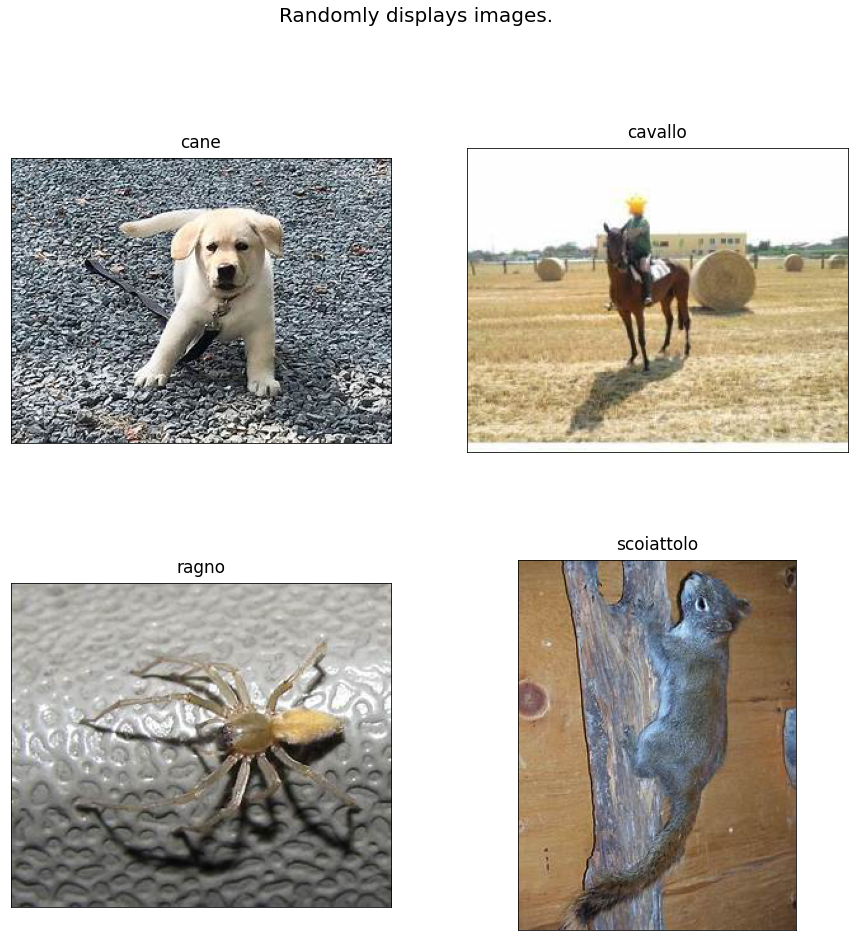

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Randomly displays images.", fontsize=20)
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      animals_selected = animals_sorted[animals_id] 
      animals_id += 1
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=17)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

In [24]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [25]:
batch_size = 256

data_train = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    animals, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 11337 images belonging to 4 classes.
Found 2832 images belonging to 4 classes.


In [26]:
tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])


In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.93 and logs.get('val_accuracy')>0.93):
      print("\nAkurasi telah mencapai >93%!")
      self.model.stop_training = True
callbacks = myCallback()


In [30]:
history = model.fit(data_train, 
                    epochs = 50, 
                    steps_per_epoch = data_train.samples // batch_size,
                    validation_data = data_val, 
                    validation_steps = data_val.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/50
44/44 [==============================] - 89s 2s/step - loss: 0.3421 - accuracy: 0.8728 - val_loss: 0.3541 - val_accuracy: 0.8672
Epoch 2/50
44/44 [==============================] - 87s 2s/step - loss: 0.3279 - accuracy: 0.8769 - val_loss: 0.3644 - val_accuracy: 0.8604
Epoch 3/50
44/44 [==============================] - 88s 2s/step - loss: 0.3249 - accuracy: 0.8765 - val_loss: 0.3729 - val_accuracy: 0.8675
Epoch 4/50
44/44 [==============================] - 87s 2s/step - loss: 0.3099 - accuracy: 0.8834 - val_loss: 0.3604 - val_accuracy: 0.8661
Epoch 5/50
44/44 [==============================] - 87s 2s/step - loss: 0.3365 - accuracy: 0.8733 - val_loss: 0.3833 - val_accuracy: 0.8636
Epoch 6/50
44/44 [==============================] - 86s 2s/step - loss: 0.3344 - accuracy: 0.8776 - val_loss: 0.3822 - val_accuracy: 0.8651
Epoch 7/50
44/44 [==============================] - 86s 2s/step - loss: 0.3246 - accuracy: 0.8786 - val_loss: 0.3528 - val_accuracy: 0.8761
Epoch 8/50
44/44 [==

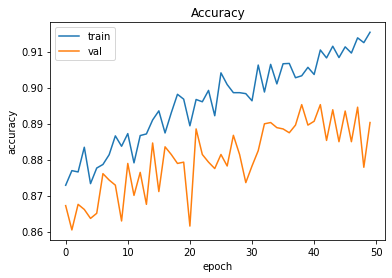

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

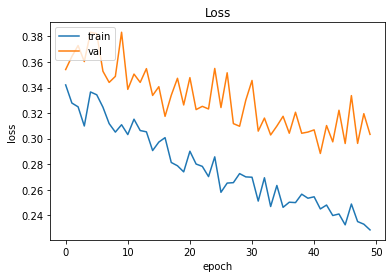

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpllx8aut2/assets


INFO:tensorflow:Assets written to: /tmp/tmpllx8aut2/assets


In [35]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13900460 Oct 14 08:50 model.tflite
